# Introduction

#### - The aim of this is project is to investigate the relation between economic outcome of given countries and life expectancy of their citizens.

### Main Questions
     1. did GDP of countries increased over time?
     2. did life expentancy of these six countries increased over time?
     3. Is there any relation between the economic outcome of a ntion (GDP) and it's life expectancy?
     4. What is average GDP and life expectancy of these nations?
     5. Their distribution?
     
### The fallowing six countries are represented in the data
    1. China
    2.United States of America
    3. Chile
    4. Zimbawe
    5. Germany
    6. Mexico

#### Set Up

In [620]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler

#### Preparing Data 

In [621]:
df = pd.read_csv('all_data.csv')
df.head()
#df.describe()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [622]:
#Converting longer titles/names
df.rename(columns = {
    'Life expectancy at birth (years)': 'LEABY'
}, inplace = True)
df.replace('United States of America', 'USA', inplace = True)

#Converting GDP in Bllions(USD)
df.GDP = df.GDP/10000000000
df.head()
#print(df.Country.unique())

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093
1,Chile,2001,77.3,7.097992
2,Chile,2002,77.8,6.973681
3,Chile,2003,77.9,7.564346
4,Chile,2004,78.0,9.921039


### 1. Analysing Data for GDP Growth

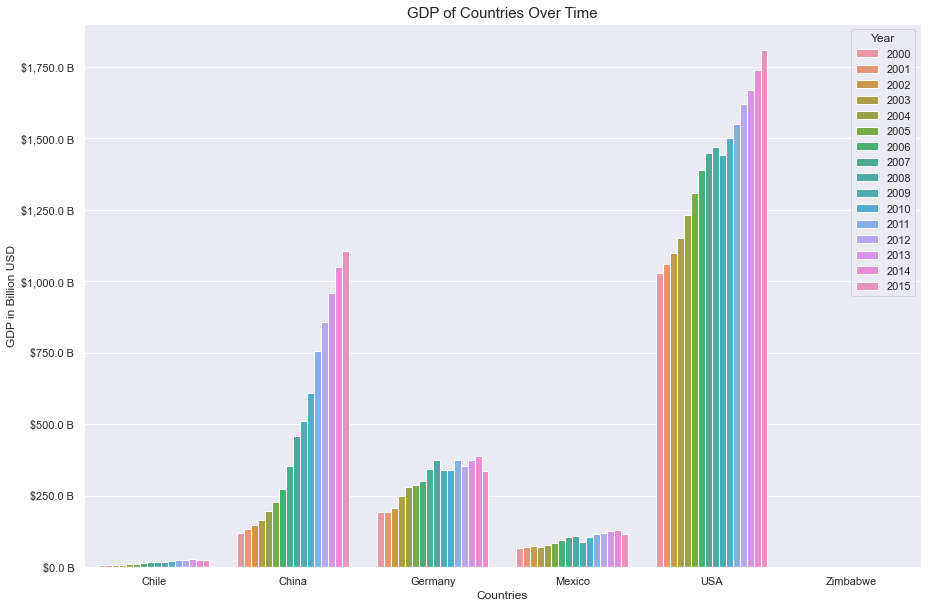

In [623]:
sns.set_palette('bright')
sns.set_style('darkgrid')

fig = plt.figure(figsize = (15, 10))
fig = fig.add_subplot()

sns.barplot(data = df, x = 'Country', y = 'GDP', hue = 'Year')
fig.set_title('GDP of Countries Over Time', fontsize = 15)
fig.set_xlabel('Countries')
fig.set_ylabel('GDP in Billion USD')

fmt = '${x:,.1f} B'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick)

    Country          GDP
0     Chile    16.978885
1     China   495.771375
2   Germany   309.477562
3    Mexico    97.665063
4       USA  1407.500000
5  Zimbabwe     0.906258


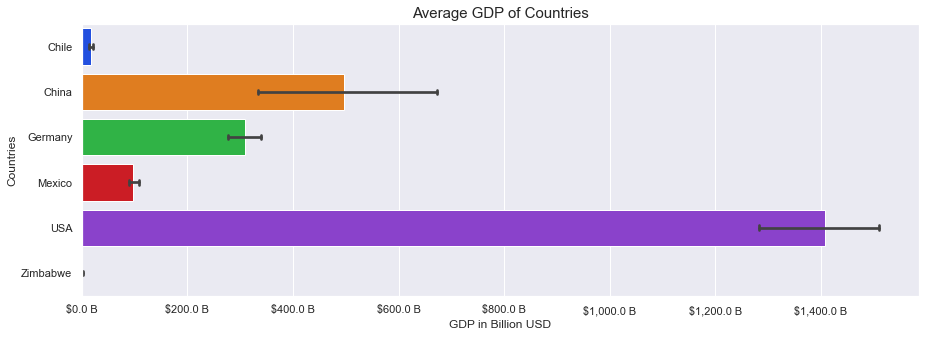

In [624]:
avg_gdp = df.groupby(['Country']).GDP.mean().reset_index()
print(avg_gdp)
fig = plt.figure(figsize = (15, 5))
fig = fig.add_subplot()

sns.barplot(data = df, y = 'Country', x = 'GDP', capsize = .1)
fig.set_title('Average GDP of Countries', fontsize = 15)
fig.set_ylabel('Countries')
fig.set_xlabel('GDP in Billion USD')

fmt = '${x:,.1f} B'
tick = mtick.StrMethodFormatter(fmt)
fig.xaxis.set_major_formatter(tick)

Text(0.5, 0.98, 'GDP Line Plot for Each Country over Time')

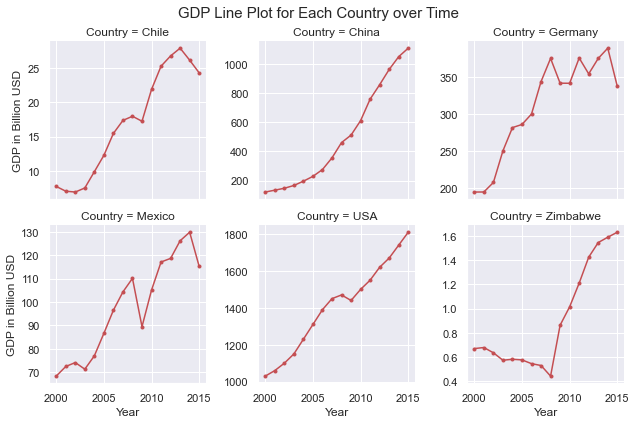

In [625]:
fig = sns.FacetGrid(data=df, col='Country', col_wrap=3, sharey = False)
fig = fig.map(plt.plot, 'Year', 'GDP', color = 'r', marker = '.')

fig.set_xlabels('Year')
fig.set_ylabels('GDP in Billion USD')
#fig.add_legend()

plt.subplots_adjust(top=0.9)
fig.fig.suptitle('GDP Line Plot for Each Country over Time', fontsize = 15)

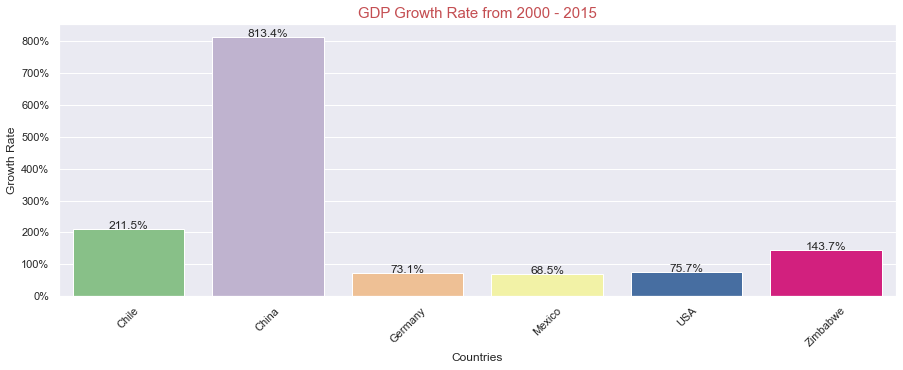

In [626]:
gdp_growth_rate = pd.DataFrame({'Country': df.Country.unique(),
                'gdp_2000': df.loc[(df['Year']==2000), 'GDP'].values,
                'gdp_2015': df.loc[(df['Year']==2015), 'GDP'].values})

gdp_growth_rate['g_rate'] = ((growth_rate.gdp_2015 - growth_rate.gdp_2000) / growth_rate.gdp_2000) * 100
#print(growth_rate)

fig = plt.figure(figsize = (15, 5))
fig = fig.add_subplot()

sns.set_palette('Accent')
sns.barplot(data = gdp_growth_rate, y = 'g_rate', x = 'Country' )

fig.set_xlabel('Countries')
plt.xticks(rotation = 45)
fig.set_ylabel('Growth Rate')
fig.set_title('GDP Growth Rate from 2000 - 2015', fontsize = 15, color = 'r')

fmt = '{x:.0f}%'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick)



for p in fig.patches:
    value = '{:.1f}%'.format(p.get_height()) 
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    fig.annotate(value, (x, y), ha='center', fontsize = 12)

### 2. Analysising Data for Life Expectancy

    Country     LEABY
0     Chile  78.94375
1     China  74.26250
2   Germany  79.65625
3    Mexico  75.71875
4       USA  78.06250
5  Zimbabwe  50.09375


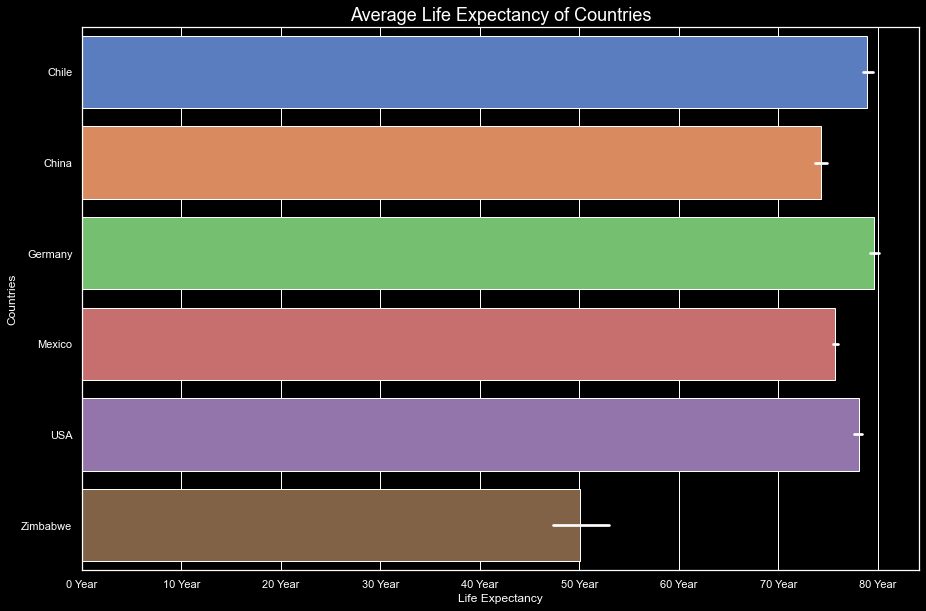

In [627]:
avg_leaby = df.groupby(['Country']).LEABY.mean().reset_index()
print(avg_leaby)
sns.set_style('darkgrid', {'axes.facecolor':'black', 'figure.facecolor':'black'})
sns.set_palette('muted')

fig = plt.figure(figsize = (15, 10))
fig = fig.add_subplot()

fig = sns.barplot(data = df, x = 'LEABY', y = 'Country', errcolor = 'w')
fig.tick_params(axis='both', colors='white', labelsize=11)
fig.set_xlabel('Life Expectancy', color = 'w', fontsize = 12)
fig.set_ylabel('Countries', color = 'w', fontsize = 12)
fig.set_title('Average Life Expectancy of Countries', fontsize = 18, color = 'w')

#legend = plt.legend(loc=2, fontsize=12)
#plt.setp(legend.get_texts(), color='w')

fmt = '{x:.0f} Year'
tick = mtick.StrMethodFormatter(fmt)
fig.xaxis.set_major_formatter(tick)


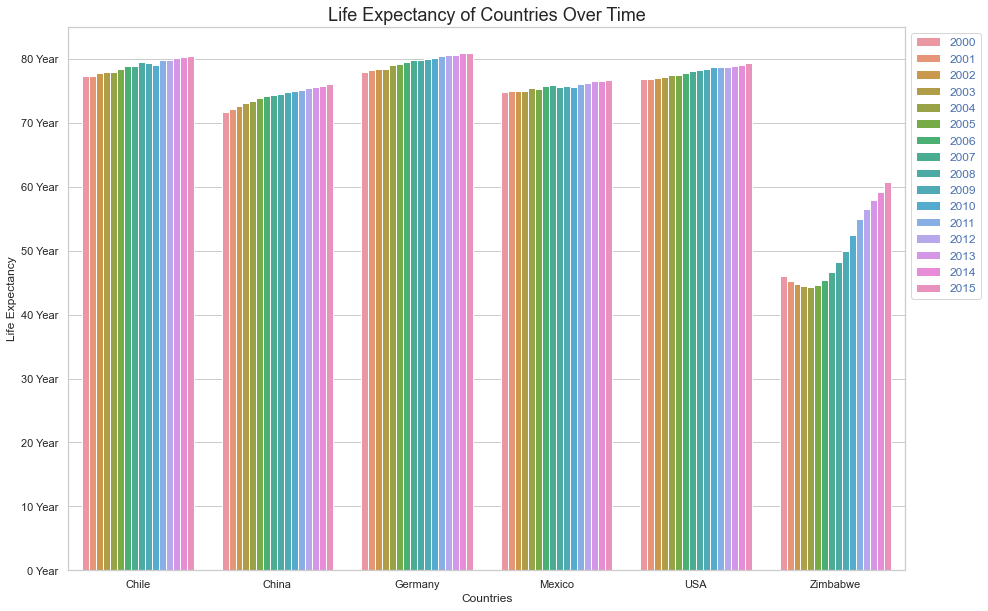

In [628]:
sns.set_style('whitegrid')
sns.set_palette('muted')

fig = plt.figure(figsize = (15, 10))
fig = fig.add_subplot()

fig = sns.barplot(data = df, y = 'LEABY', x = 'Country', hue = 'Year')
fig.set_ylabel('Life Expectancy')
fig.set_xlabel('Countries')
fig.set_title('Life Expectancy of Countries Over Time', fontsize = 18)
legend = plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.setp(legend.get_texts(), color = 'b')

fmt = '{x:.0f} Year'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick)

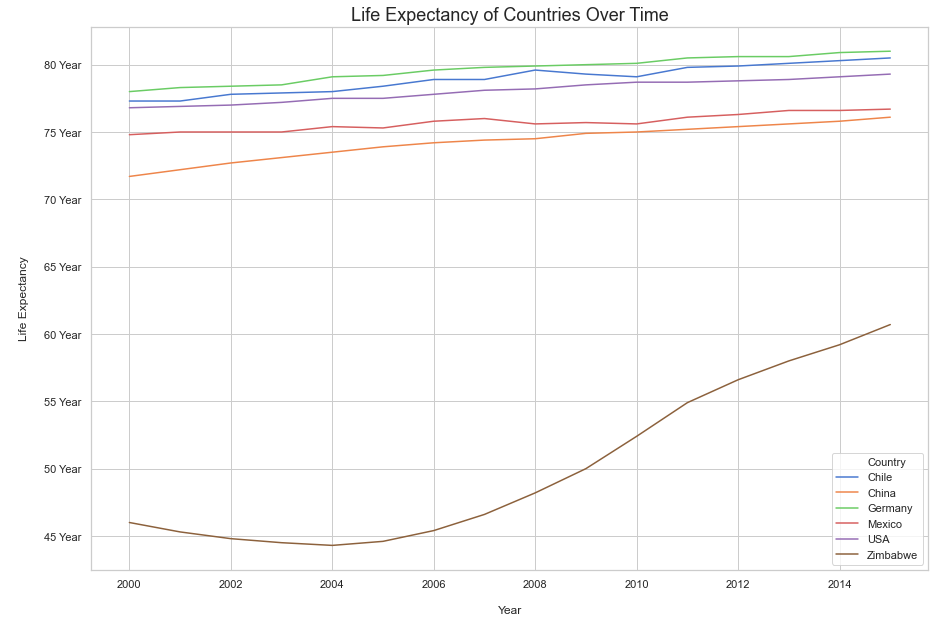

In [629]:
sns.set_style('whitegrid')
sns.set_palette('muted')

fig = plt.figure(figsize = (15, 10))
fig = fig.add_subplot()

fig = sns.lineplot(data = df, y = 'LEABY', x = 'Year', hue = 'Country')
fig.set_ylabel('\nLife Expectancy\n', fontsize = 12)
fig.set_xlabel('\nYear\n', fontsize = 12)
fig.set_title('Life Expectancy of Countries Over Time', fontsize = 18)
plt.legend(loc = 4)

fmt = '{x:.0f} Year'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick)

Text(0.5, 0.98, 'Line Plot of Life Expectancy for Each Country over Time')

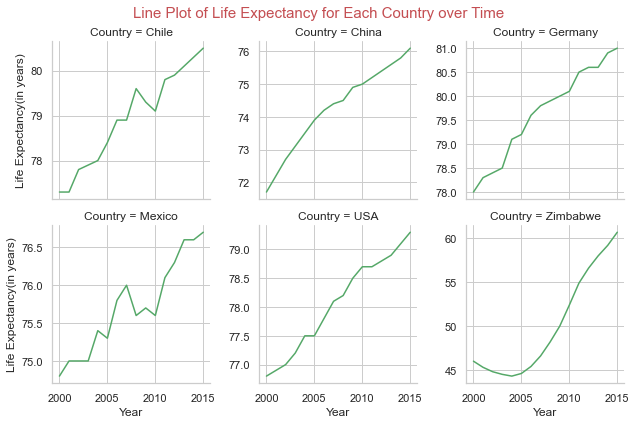

In [630]:
fig = sns.FacetGrid(data = df, col = 'Country', sharey = False, col_wrap = 3)
fig = fig.map(plt.plot, 'Year', 'LEABY', color = 'g')

fig.set_xlabels('Year', fontsize = 12)
fig.set_ylabels('Life Expectancy(in years)')

plt.subplots_adjust(top=0.9)
fig.fig.suptitle('Line Plot of Life Expectancy for Each Country over Time', fontsize = 15, color = 'r')

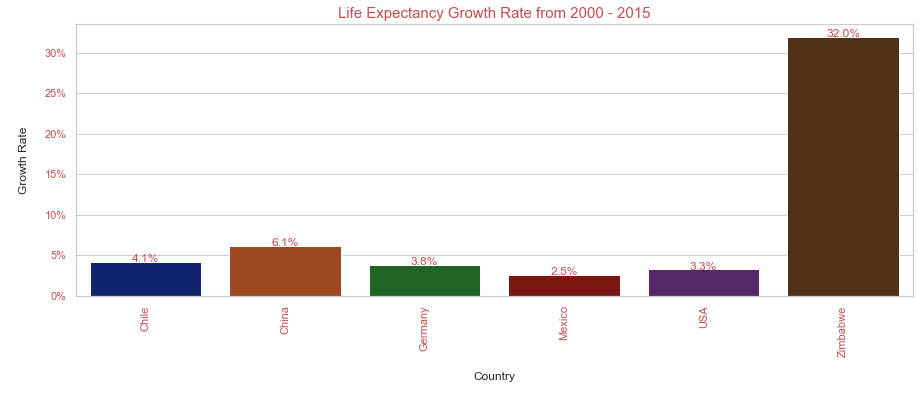

In [631]:
leaby_growth_rate =  pd.DataFrame({'Country': df.Country.unique(),
                                   'leaby_2000': df.loc[(df['Year'] == 2000), 'LEABY'].values,
                                   'leaby_2015': df.loc[(df['Year'] == 2015), 'LEABY'].values})
leaby_growth_rate['g_rate'] = ((leaby_growth_rate.leaby_2015 - leaby_growth_rate.leaby_2000) / leaby_growth_rate.leaby_2000) * 100
#print(leaby_growth_rate)

sns.set_palette('dark')
fig = plt.figure(figsize = (15, 5))
fig = fig.add_subplot()

sns.barplot(data = leaby_growth_rate, x = 'Country', y = 'g_rate')

fig.set_xlabel('\nCountry\n', fontsize = 12)
plt.xticks(rotation = 90, color = 'r')
plt.yticks(color = 'r')
fig.set_ylabel('\nGrowth Rate\n', fontsize = 12)
fig.set_title('Life Expectancy Growth Rate from 2000 - 2015', fontsize = 15, color = 'r')

fmt = '{x:.0f}%'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick)

for p in fig.patches:
    value = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    fig.annotate(value, (x, y), ha='center', fontsize = 12, color = 'r')

### 3. Analysing if there is any relation between GDP Growth Rate and LEABY & LEABY Distribution

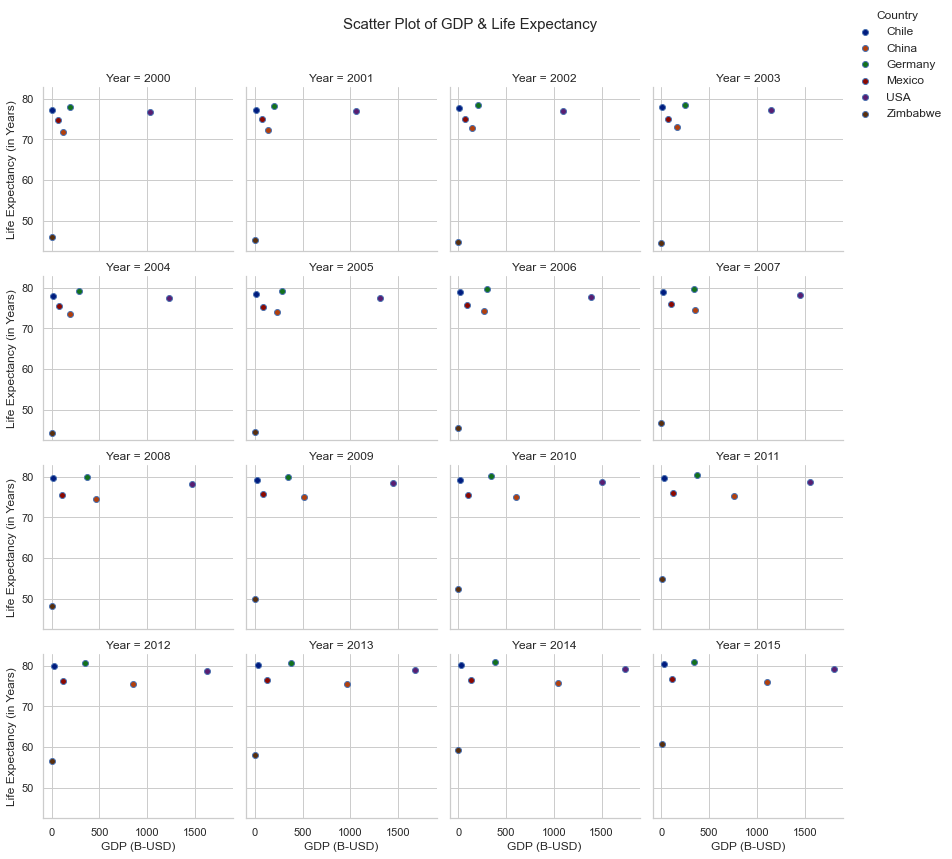

In [632]:
#sns.scatterplot(data = df, x = 'GDP', y = 'LEABY')
fig = sns.FacetGrid(data = df, col = 'Year', hue = 'Country', col_wrap = 4)
fig = fig.map(plt.scatter, 'GDP', 'LEABY', edgecolor = 'b').add_legend(fontsize = 12, loc = 1)

fig.set_xlabels('GDP (B-USD)')
fig.set_ylabels('Life Expectancy (in Years)')
plt.subplots_adjust(top=0.9)
fig.fig.suptitle('Scatter Plot of GDP & Life Expectancy', fontsize = 15);

In [633]:
covariance = np.cov(df.GDP, df.LEABY)
corelation, p = stats.pearsonr(df.GDP, df.LEABY)
rvalue, pvalue = stats.spearmanr(df.GDP,df.LEABY)
print(rvalue)
print(covariance)
print(corelation)

0.4472391846883402
[[2.70146436e+05 1.90386943e+03]
 [1.90386943e+03 1.13910417e+02]]
0.343206748449156


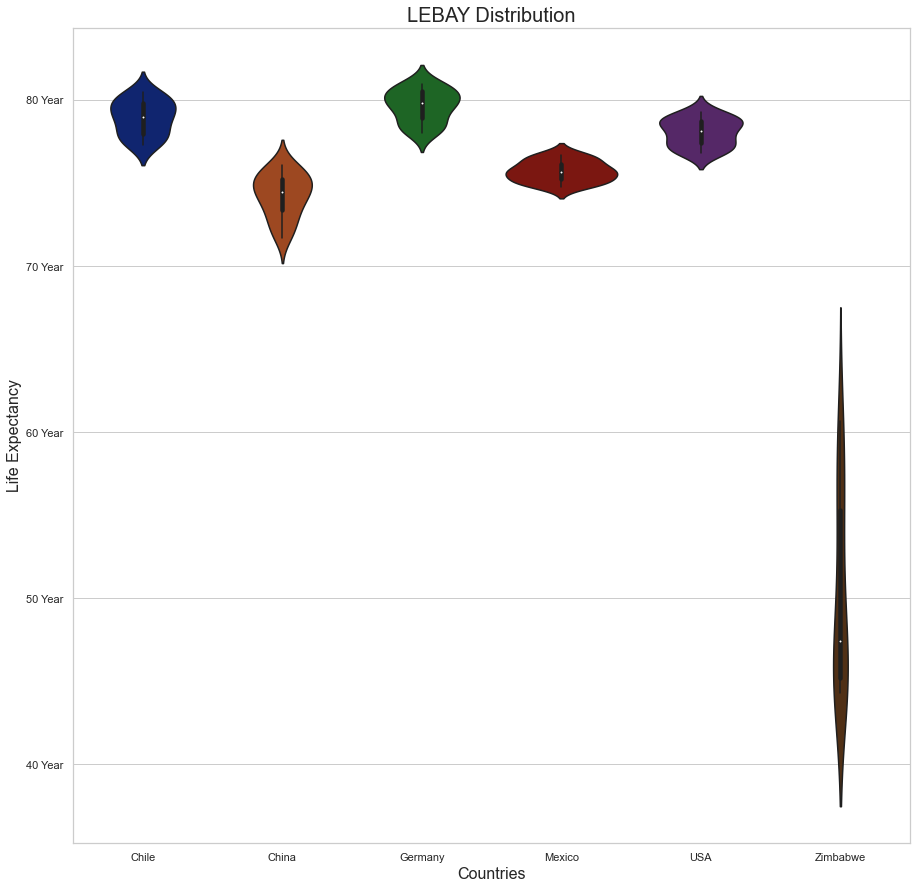

In [634]:
fig = plt.subplots(figsize=(15, 15)) 
fig = sns.violinplot(df['Country'], df['LEABY']);
plt.ylabel('Life Expectancy', fontsize = 16)
plt.title('LEBAY Distribution', fontsize = 20)
plt.xlabel('Countries', fontsize = 16);

fmt = '{x:.0f} Year'
tick = mtick.StrMethodFormatter(fmt)
fig.yaxis.set_major_formatter(tick)

## Conclusion

    - All the countries listed above had a GDP growth between 2000 and 2015. In the 15 year period (2000-2015), China had a gigantic    exponential GDP growth, with the growth rate of 813% followed by chile which had a significant 211% growth rate, while US had a
    growth of 75% between 2000 and 2015.
    
    - Most of the countries had their GDP drop in 2008 - 2009 with the exception of China and Zimbabwe due to the financial crisis of    2007 - 2008. After 2009 Germany don't had stable GDP levels, dropping and rising almost from one year to another, with a 
    significant drop in 2015.
    
    Average GDPs of countries are as follows
         Country      GDP(USD-B)
          Chile         16.978885
          China        495.771375
         Germany      309.477562
          Mexico       97.665063
           USA        1407.500000
        Zimbabwe     0.906258

      - The Life Expectancy increased over time in all six countries, but Zimbabwe has had the most significant growth of life Expectancy, 
    with a growth rate of 32% between 2000 and 2015 but It is important to note that Zimbabwe also experienced a decrease in Life 
    Expectancy between 2000 and 2004.
    
    Average Life Expectancy of countries are as follows
        Country   Life Expectancy(Years)
         Chile        78.94375
         China       74.26250
        Germany     79.65625
         Mexico      75.71875
          USA       78.06250
       Zimbabwe     50.09375

    - Both coefficient of correlations (Pearsonr = + 0.3 & Spearman = +0.45)  indicates a correlation between the variable 'GDP' and the 
    variable 'Life expectanty at birth in years'. Scatterplots also indicates few patterns between these variables.
    - However, coefficient of correlations are not significantly large, and I would like to acknoweldge that the DataFrame used in this project is relatively small and the analysis is fairly primitive ( no standard deviation calculation or error bars, few variables, etc ), therefore a 
    causal relationship between the two variable is hardly proven here.

    - Based Life Expectancy Country & Year Distribution, Chile and Germany's distributions figures are very similar.
    -Chile LEABY distribution spreads between 76 and 81.5 years while Germany with a LEABY distribution spread between 76.9 and 82 
    years.
    
    - The US distribution LEABY (2000-2015) figure is similar in shape to the Germany distribution LEABY, but with the US having its 
    highest concentration of LEABY at 78.5 years instead of 80 years and with the US having almost no LEABY higher than 80 years.
    The US average LEBAY is roughly 1.5 years lower than the Germany average (2000-2015) LEBAY.
    
    - The US LEABY distribution spreads between 76 and 81.5 years compared to Germany with a LEABY 
    distribution spread between 76.9 and 80.3 years.
    
    - Mexico and China have roughly an average (2000-2015) LEBAY of 74 years and 75.5 years respectively. China has a more broadly    distributed LEABY between 70 and 77.5 years, compared to Mexico with a distribution spread between 74 and 77.5 years.
    
    - Mexico highest concentration of LEABY is at 75.5 years.
    
    - Zimbabwe has the most spread out distribution LEABY (2000-2015) shape, from 37.5 to 67.5 years. It has also the lowest average (2000-2015) LEBAY at 50 years.